In [134]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from feature_engine.imputation import CategoricalImputer


#We read the dataset
data = pd.read_csv("./data.csv")

#We display the first 10 rows of the dataset
data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,1


In [135]:
#We separate the lables of the columns of the categorical variables in the training dataset
categorical_vars = data.select_dtypes(include="O").columns.to_list()

#We print the lables of the columns of the categorical variables in the training dataset
print(categorical_vars)
"""
Output:

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
"""

#We calculate percentage of the mean of the missing values in the whole dataset, for the columns of the categorical variables.
#We identify the missing values by the isnull() method of the pandas dataframe and we calculate the mean with the mean() method.
frequencies = data[categorical_vars].isnull().mean()  * 100

#We print the percentage of the mean of the missing values
print(frequencies)
"""
Output: 

A1     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A9     0.000000
A10    0.000000
A12    0.000000
A13    0.000000
dtype: float64
"""

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
A1     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A9     0.000000
A10    0.000000
A12    0.000000
A13    0.000000
dtype: float64


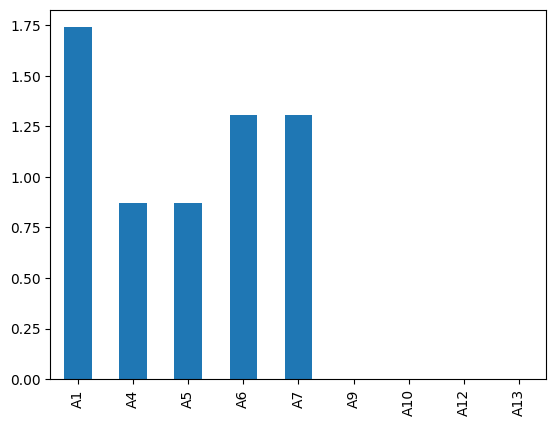

In [136]:
#We plot the percentage of the mean of the missing values
frequencies.plot(kind='bar')
plt.show()

In [137]:
#We find the most frequent value for each categorical variable by using the mode() method of the pandas dataframe
frequent_values = data[categorical_vars].mode().iloc[0].to_dict()
print(frequent_values)

"""
Output:

{'A1': 'b',
 'A4': 'u',
 'A5': 'g',
 'A6': 'c',
 'A7': 'v',
 'A9': 't',
 'A10': 'f',
 'A12': 'f',
 'A13': 'g'}
"""

{'A1': 'b',
 'A4': 'u',
 'A5': 'g',
 'A6': 'c',
 'A7': 'v',
 'A9': 't',
 'A10': 'f',
 'A12': 'f',
 'A13': 'g'}

In [138]:
#We fill the missing values of the dataset with the most frequent value of each categorical variable, implementing
#this way the Frequent Category Imputation.
data = data.fillna(value=frequent_values)


#We calculate percentage of the mean of the missing values in the whole dataset once again, after we have imputed them.
#This time we expect every percentage to be 0.
imputed_frequencies = data[categorical_vars].isnull().mean()  * 100

#We print the percentage of the mean of the missing values in the whole dataset once again, after we have imputed them.
print(imputed_frequencies)

"""
Output:

A1     0.0
A4     0.0
A5     0.0
A6     0.0
A7     0.0
A9     0.0
A10    0.0
A12    0.0
A13    0.0
dtype: float64
"""

A1     0.0
A4     0.0
A5     0.0
A6     0.0
A7     0.0
A9     0.0
A10    0.0
A12    0.0
A13    0.0
dtype: float64


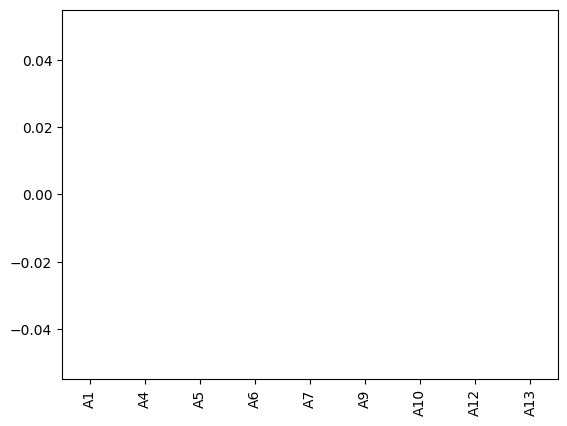

In [139]:
#We plot the percentage of the mean of the missing values in the whole dataset once again, after we have imputed them.
imputed_frequencies.plot(kind='bar')
plt.show()